In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import qmc

from scikit_poles_zeros._domain import Rectangle, _subdivide_domain
from scikit_poles_zeros._zeros import find_zeros

In [2]:
N = 100
rng = np.random.default_rng(12345)
eps = np.finfo(np.float64).eps

In [3]:
sampler = qmc.Sobol(d=2, rng=rng)
tmp = sampler.random(N)
zeros = tmp[:, 0] + tmp[:, 1] * 1j

/home/j-bowhay/development/scikit-poles-zeros/venv/lib/python3.13/site-packages/scipy/stats/_qmc.py:993: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


In [4]:
def f(z):
    return np.prod(np.subtract.outer(z, zeros), axis=-1)


def f_z(z):
    tmp = np.subtract.outer(z, zeros)
    return np.prod(tmp, axis=-1) * np.sum(1 / tmp, axis=-1)

In [5]:
d = Rectangle(0, complex(1, 1))
_subdivide_domain(d, f, f_z, max_arg_principle=7.1)

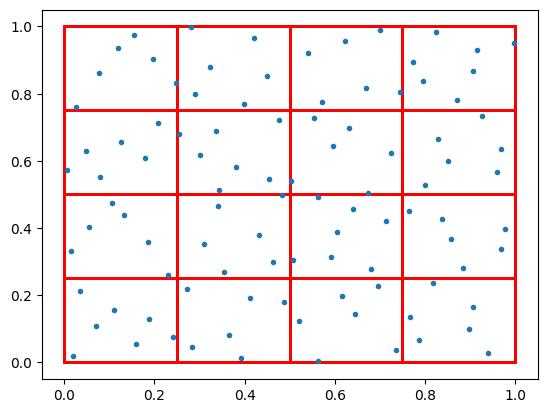

In [6]:
fig, ax = plt.subplots()
d.plot(ax)
ax.plot(zeros.real, zeros.imag, ".")

In [7]:
d = Rectangle(0, complex(1, 1))
find_zeros(d, f, f_z, max_arg_principle=7.1)

expected=(7+0j), actual=np.complex128(7.000000000000134+1.5113220467859013e-14j)


TypeError: 'numpy.ndarray' object is not callable